<a href="https://colab.research.google.com/github/VyshnaviBasude/Team-TrailBlazers/blob/main/Data_Optimizing_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/archive (10).zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall( path="/content/")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# Specify the appropriate encoding
df = pd.read_csv("/content/rideshare_kaggle.csv")
# Display the first 4 rows of the dataframe
df.head(4)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800


In [ ]:
df.dropna(inplace=True)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
# Define target and ID columns:
target = 'distance'
IDcol = 'product_id'

attributes = [
    "id", "timestamp", "hour", "day", "month", "datetime", "timezone", "source",
    "destination", "cab_type", "product_id", "name", "price", "distance",
    "surge_multiplier", "latitude", "longitude", "temperature",
    "apparentTemperature", "short_summary", "long_summary", "precipIntensity",
    "precipProbability", "humidity", "windSpeed", "windGust", "windGustTime",
    "visibility", "temperatureHigh", "temperatureHighTime", "temperatureLow",
    "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime",
    "apparentTemperatureLow", "apparentTemperatureLowTime", "icon", "dewPoint",
    "pressure", "windBearing", "cloudCover", "uvIndex", "visibility.1", "ozone",
    "sunriseTime", "sunsetTime", "moonPhase", "precipIntensityMax", "uvIndexTime",
    "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime",
    "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax",
    "apparentTemperatureMaxTime"
    ]

In [ ]:
predictors = [x for x in attributes if x not in [target, IDcol]]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'source' and 'destination' columns
df['source'] = label_encoder.fit_transform(df['source'])
df['destination'] = label_encoder.fit_transform(df['destination'])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


feature_columns = ['hour', 'day','month', 'temperatureMin', 'temperatureMax']
target_variable = 'cab_type'

# Create feature matrix (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree classifier with specified hyperparameters
# max_depth controls the maximum depth of the tree
# min_samples_split is the minimum number of samples required to split an internal node
# You can adjust these values based on your dataset and desired complexity of the tree
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=4)

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)
print('\nClassification Report:\n', classification_report(y_test,y_pred))

Accuracy: 0.5207530016614941

Classification Report:
               precision    recall  f1-score   support

        Lyft       0.51      0.08      0.13     61339
        Uber       0.52      0.93      0.67     66257

    accuracy                           0.52    127596
   macro avg       0.52      0.50      0.40    127596
weighted avg       0.52      0.52      0.41    127596



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming your dataset is in a DataFrame called 'df'
feature_columns = ['source', 'price', 'destination', 'temperatureMin', 'temperatureMax']
target_variable = 'cab_type'

# Create feature matrix (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Define hyperparameters for grid search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the search
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train, y_train)
# Predict on the test set
y_pred = best_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print best hyperparameters, accuracy, and classification report
print('Best Hyperparameters:', grid_search.best_params_)
print(f'Accuracy: {accuracy}')

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8385294209849838


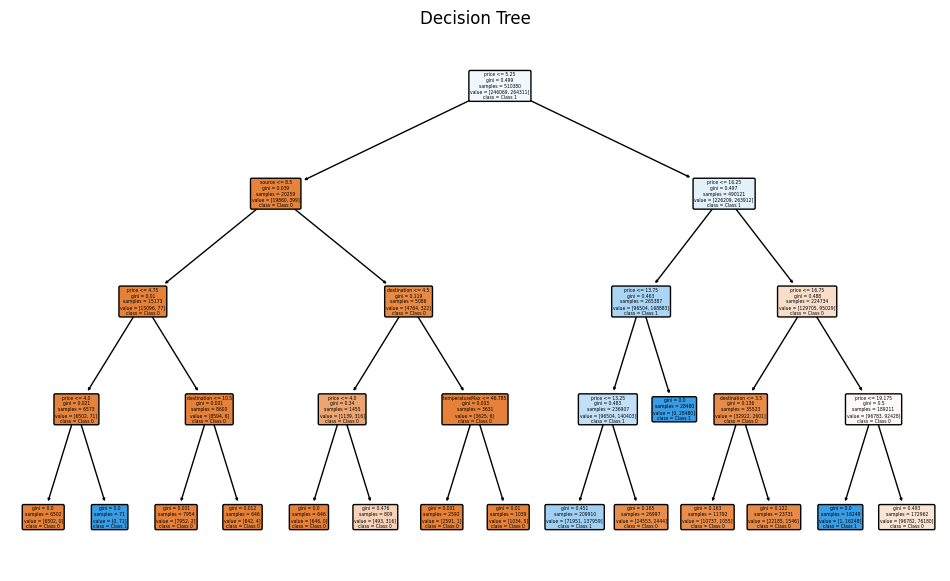

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth= 4)
dt.fit(X_train,y_train)

# Assuming decision_tree is already trained
plt.figure(figsize=(12, 7))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded =True)
plt.title('Decision Tree')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and labels respectively
# You may need to preprocess your data first if it's not ready for modeling
# Assuming X and y are your features and labels respectively
# You may need to preprocess your data first if it's not ready for modeling
feature_columns = ['hour', 'day','month', 'temperatureMin', 'temperatureMax']
target_variable = 'cab_type'


# Create feature matrix (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a KNN classifier with specified hyperparameters
# n_neighbors is the number of neighbors to consider
# You can adjust this value based on your dataset
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)
print('\nClassification Report:\n', classification_report(y_test,y_pred))


Accuracy: 0.5007758863914229

Classification Report:
               precision    recall  f1-score   support

        Lyft       0.48      0.49      0.48     61339
        Uber       0.52      0.51      0.52     66257

    accuracy                           0.50    127596
   macro avg       0.50      0.50      0.50    127596
weighted avg       0.50      0.50      0.50    127596



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

# Assuming your dataset is in a DataFrame called 'df'
feature_columns = ['source', 'price', 'destination', 'temperatureMin', 'temperatureMax', "latitude", "longitude", "distance"]
target_variable = 'cab_type'

# Create feature matrix (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameter distributions for randomized search
param_dist = {
    'n_neighbors': randint(1, 20),  # Random integer values from 1 to 20
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform randomized search with cross-validation
randomized_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best model from the search
best_model = randomized_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best hyperparameters, accuracy, and classification report
print('Best Hyperparameters:', randomized_search.best_params_)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Best Hyperparameters: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9120975579171761

Classification Report:
               precision    recall  f1-score   support

        Lyft       0.90      0.92      0.91     61339
        Uber       0.93      0.90      0.91     66257

    accuracy                           0.91    127596
   macro avg       0.91      0.91      0.91    127596
weighted avg       0.91      0.91      0.91    127596



In [ ]:
pip install seaborn matplotlib

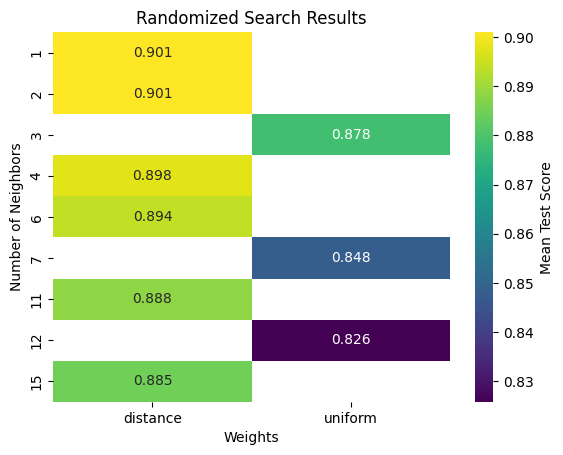

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract the results of the randomized search
results = pd.DataFrame(randomized_search.cv_results_)

# Create a heatmap to visualize the performance
heatmap_data = results.pivot_table(index='param_n_neighbors', columns='param_weights', values='mean_test_score')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', cbar_kws={'label': 'Mean Test Score'})
plt.title('Randomized Search Results')
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.show()

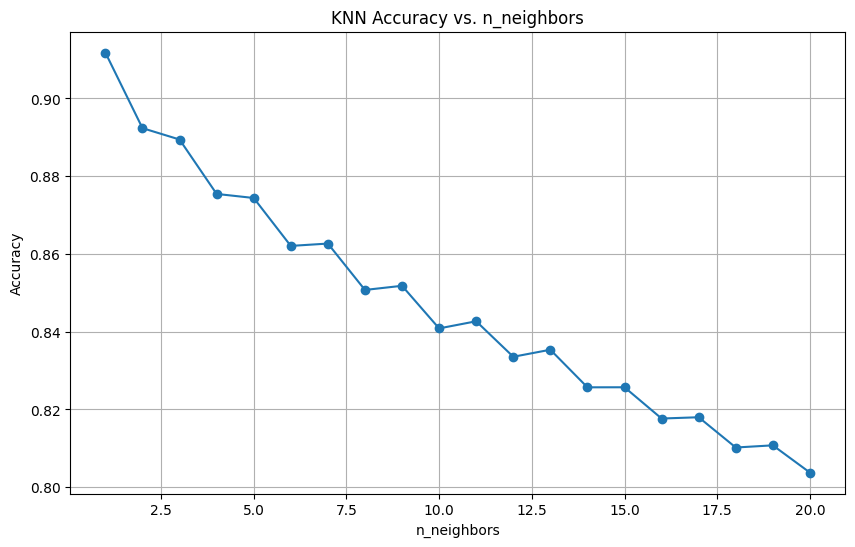

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined
# Initialize a list of candidate values for n_neighbors
n_neighbors_values = list(range(1, 21))  # Try values from 1 to 20

# Initialize an empty list to store accuracy scores
accuracy_scores = []

for n_neighbors in n_neighbors_values:
    # Initialize a KNN classifier with the current n_neighbors value
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Predict the labels on the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = DecisionTreeClassifier(max_depth=5)

# AdaBoost model using the base Learner
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

predictions = adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"accuracy: {accuracy}" )

accuracy: 0.9759240101570582


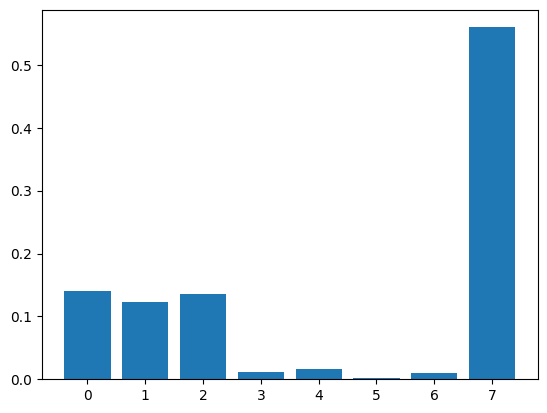

In [ ]:
if isinstance(base_classifier, DecisionTreeClassifier):
  feature_importance = adaboost_model.feature_importances_
  plt.bar(range(len(feature_importance)),feature_importance)
  plt.show()

In [ ]:
pip install xgboost

In [ ]:
# Drop non-numeric columns
non_numeric_columns = ['id', 'datetime', 'timezone', 'source', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']
df_numeric = df.drop(non_numeric_columns, axis=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Check Label Values
print(df['destination'].unique())

# Step 2: Label Encoding (Optional)
label_encoder = LabelEncoder()
df['destination'] = label_encoder.fit_transform(df['destination'])

# Check unique values after encoding
print(df['destination'].unique())

# Encode the target variable
df['cab_type'] = label_encoder.fit_transform(df['cab_type'])

# Drop non-numeric columns
non_numeric_columns = ['id', 'datetime', 'timezone', 'source', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']
df_numeric = df.drop(non_numeric_columns, axis=1)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_numeric.drop('cab_type', axis=1), df_numeric['cab_type'], test_size=0.2, random_state=42)

# Step 5: Convert Data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 6: XGBoost Parameters
param_grid = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
# Step 7: Train XGBoost Model
num_rounds = 100
model = xgb.train(param_grid, dtrain, num_rounds)

# Step 8: Make Predictions
predictions = model.predict(dtest)
predictions_binary = [1 if p > 0.5 else 0 for p in predictions]
# Step 9: Evaluate Accuracy
accuracy = accuracy_score(y_test, predictions_binary)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# Step 10: Classification Report
class_report = classification_report(y_test, predictions_binary)
print("Classification Report:\n", class_report)

[ 7  8 11  5  9  3 10  1  0  6  4  2]
[ 7  8 11  5  9  3 10  1  0  6  4  2]
Accuracy: 95.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     61339
           1       0.97      0.94      0.96     66257

    accuracy                           0.96    127596
   macro avg       0.96      0.96      0.96    127596
weighted avg       0.96      0.96      0.96    127596



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

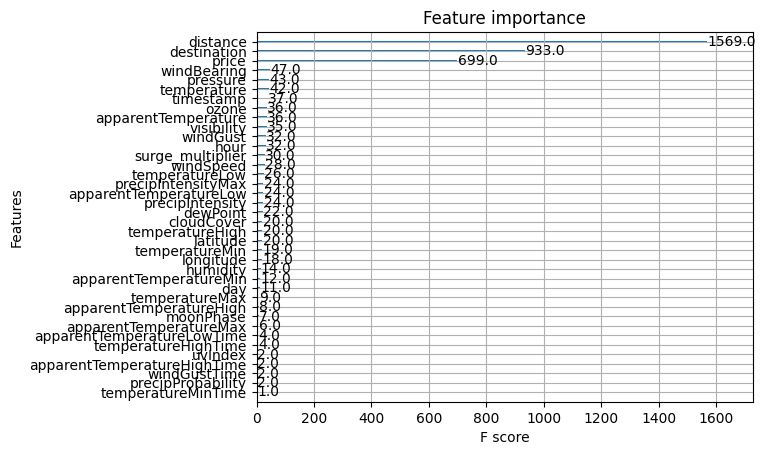

In [ ]:
xgb.plot_importance(model)

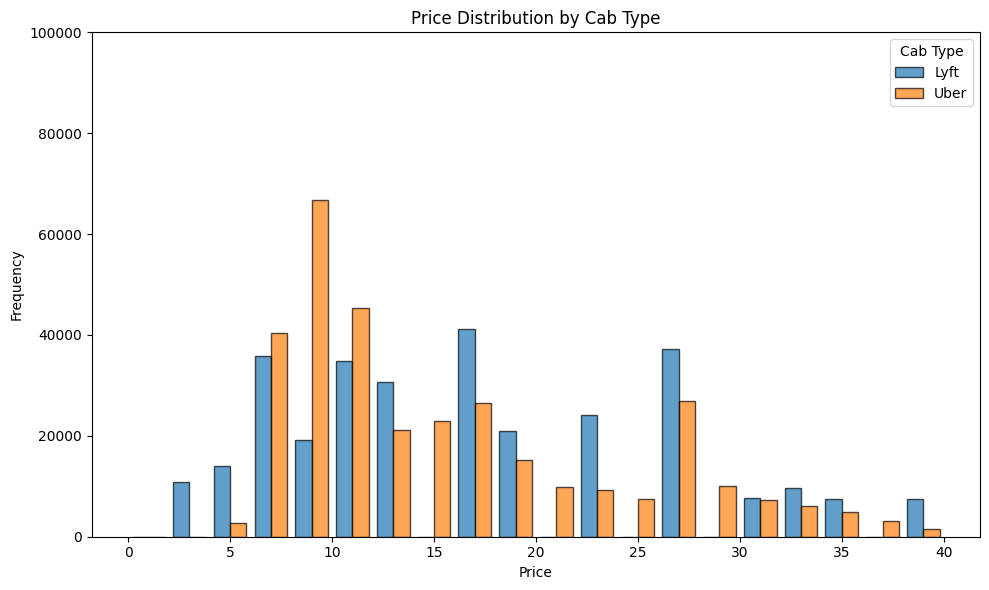

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Define the data
cab_types = df['cab_type'].unique()

# Set the number of bins for the price histogram
num_bins = 20

# Create a list of data for each cab type
data = [df[(df['cab_type'] == cab_type) & (df['price'] >= 0) & (df['price'] <= 40)]['price'] for cab_type in cab_types]

# Plot the histograms with specified ranges
plt.hist(data, bins=num_bins, range=(0, 40), alpha=0.7, label=cab_types, edgecolor='black')

# Set the y-axis limit to 100,000
plt.ylim(0, 100000)

# Add labels and title
plt.title('Price Distribution by Cab Type')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Cab Type')

plt.tight_layout()
plt.show()


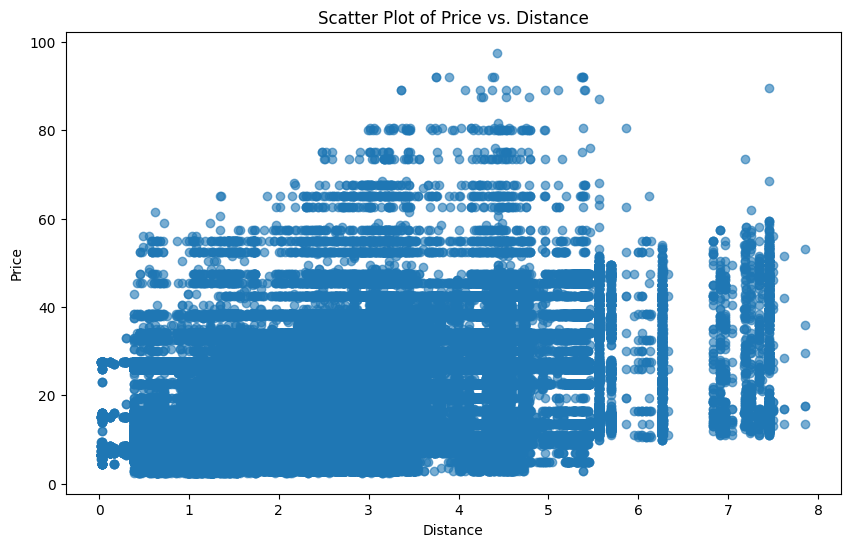

In [ ]:
#Scatter Plot

plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['price'], alpha=0.6)
plt.title('Scatter Plot of Price vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

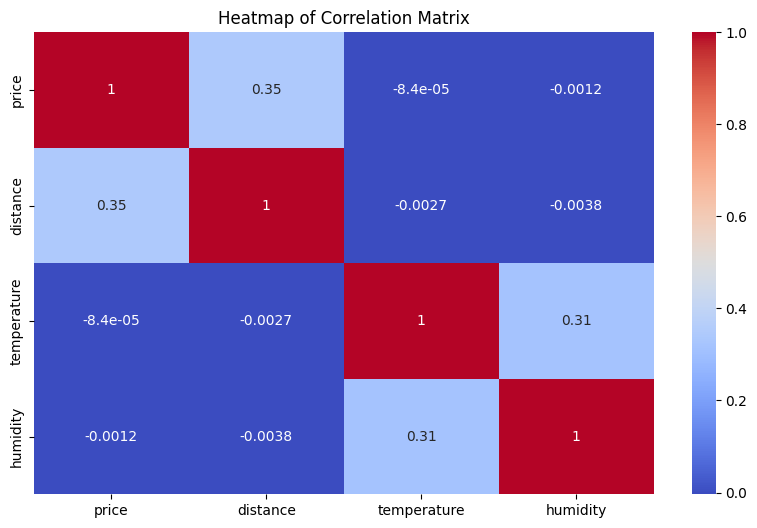

In [ ]:
#Bivariant - Numerical & Numerical - Corelation matrix
numerical_attributes = ['price', 'distance', 'temperature', 'humidity']
correlation_matrix = df[numerical_attributes].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()